In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_act_1=pd.read_csv('TrainingSet/TrainingSet/ACT1_competition_training.csv')
train_act_1.head()

,MOLECULE,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,6.0179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,5.2697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,6.1797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Summary

In [49]:
train_act_1.describe()

,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
count,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,...,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000,37241.000000
mean,4.690458,0.000081,0.000054,0.000430,0.000107,0.000027,0.000081,0.000242,0.000054,0.000027,...,0.000027,0.000027,0.000081,0.000215,0.000027,0.000027,0.000027,0.000027,0.000027,0.000027
std,0.648661,0.015546,0.010364,0.020723,0.010363,0.005182,0.008975,0.015544,0.007328,0.005182,...,0.005182,0.005182,0.008975,0.014655,0.005182,0.005182,0.005182,0.005182,0.005182,0.005182
min,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.903300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.134000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Check Missing Values

In [4]:
#check missing values
columns = train_act_1.columns
percent_missing = train_act_1.isnull().sum() * 100 / len(df_1)
missing_value_train_act_1 = pd.DataFrame({'column_name': columns, 'percent_missing': percent_missing})

missing_value_train_act_1.loc[missing_value_train_act_1['percent_missing'] != 0.0]
# no missing values

,column_name,percent_missing


## Examine the Distribution of the Target(Act) Column
The target is what we are asked to predict: the activity value for each molecule/data set combination in the test set. Note that these are raw activity values and different data sets can have activity measured in different units.

To keep predictions for molecules unique to each data set, a data set identifier has been prepended to each molecule ID (e.g., "ACT1_" or "ACT8_").

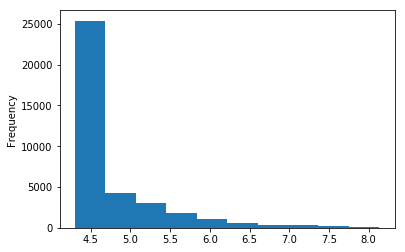

In [31]:
train_act_1['Act'].astype(float).plot.hist()

## Near Zero Variance

In [3]:
# near zero variance function
def remove_feat_constants(data_frame,threshold):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold(threshold)
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    var = sum(data_frame.var())
    n_features_deleted = feat_ix_delete.size
    n_features_leftover = n_features_originally - n_features_deleted
    #print("  - Deleted %s / %s features (~= %.1f %%)" % (
        #n_features_deleted, n_features_originally,
        #100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame,var,n_features_leftover

## Scree Plot

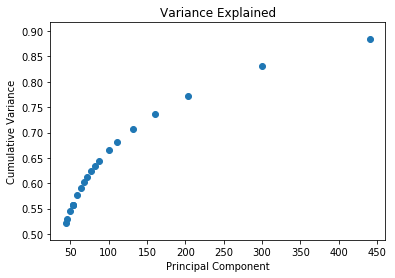

In [30]:
#Create Skree plot
var_t=sum(train_act_1.var())
var_percent_list=[]
n_features_left_list = []
for i in np.linspace(1,15,20):
    _, var_df_1, n_features_left = remove_feat_constants(x_train,i)
    var_percent_list.append(var_df_1/var_t)
    n_features_left_list.append(n_features_left)

plt.scatter(n_features_left_list,var_percent_list)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Variance Explained')
plt.show()

In [4]:
#drop the second column "Act"
X=train_act_1.iloc[:, 2: ]#All features except 'Molecule' and 'Act'
Y=train_act_1['Act']#Y is what we want to predict

In [6]:
ACT_1_reduced = remove_feat_constants(X,1)[0]

In [9]:
ACT_1_reduced['Act']=Y
ACT_1_reduced.to_csv('ACT1_train_450.csv')

## Correlation Heatmap

In [10]:
train_act_1_corr=pd.read_csv('ACT1_train_450.csv')
train_act_1_corr.head()

,Unnamed: 0,D_212,D_213,D_214,D_215,D_216,D_217,D_219,D_294,D_295,...,D_7351,D_7352,D_7954,D_7955,D_7957,D_7958,D_8051,D_8053,D_8054,Act
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0179
1,1,0,0,0,0,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,4.3003
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.2697
3,3,0,0,0,0,0,0,0,1,0,...,0,0,2,2,3,2,1,1,1,6.1797
4,4,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,1,0,0,1,4.3003


In [11]:
train_act_1_corr = train_act_1_corr.iloc[:,1:]
train_act_1_corr.head()

,D_212,D_213,D_214,D_215,D_216,D_217,D_219,D_294,D_295,D_296,...,D_7351,D_7352,D_7954,D_7955,D_7957,D_7958,D_8051,D_8053,D_8054,Act
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0179
1,0,0,0,0,0,0,0,4,4,2,...,0,0,0,0,0,0,0,0,0,4.3003
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.2697
3,0,0,0,0,0,0,0,1,0,2,...,0,0,2,2,3,2,1,1,1,6.1797
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,1,0,0,1,4.3003


In [5]:
# Find correlations with the target and sort
correlations = train_act_1_corr.corr()['Act'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 D_1114    0.147985
D_462     0.155224
D_520     0.160066
D_506     0.160286
D_516     0.161775
D_834     0.162283
D_519     0.175223
D_5524    0.183678
D_468     0.186791
D_2466    0.187259
D_518     0.191369
D_517     0.192081
D_4861    0.197755
D_4849    0.259836
Act       1.000000
Name: Act, dtype: float64

Most Negative Correlations:
 D_2135   -0.158326
D_2129   -0.157422
D_2136   -0.154669
D_2134   -0.148871
D_2138   -0.145395
D_2137   -0.140543
D_2133   -0.139589
D_2132   -0.138644
D_2131   -0.136771
D_2139   -0.135238
D_2130   -0.132742
D_2140   -0.130122
D_2142   -0.128408
D_2141   -0.128008
D_1217   -0.122878
Name: Act, dtype: float64


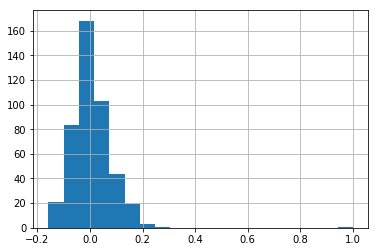

In [13]:
correlations.hist(bins=20)

In [16]:
print('Most Positive Correlations:\n', correlations.tail(30))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Positive Correlations:
 D_509     0.115756
D_5526    0.119490
D_4823    0.120182
D_1117    0.120204
D_4822    0.123939
D_5523    0.125496
D_466     0.134786
D_521     0.136434
D_835     0.137330
D_5527    0.138575
D_1115    0.139087
D_505     0.139453
D_467     0.139709
D_1116    0.140313
D_469     0.144724
D_1114    0.147985
D_462     0.155224
D_520     0.160066
D_506     0.160286
D_516     0.161775
D_834     0.162283
D_519     0.175223
D_5524    0.183678
D_468     0.186791
D_2466    0.187259
D_518     0.191369
D_517     0.192081
D_4861    0.197755
D_4849    0.259836
Act       1.000000
Name: Act, dtype: float64

Most Negative Correlations:
 D_2135   -0.158326
D_2129   -0.157422
D_2136   -0.154669
D_2134   -0.148871
D_2138   -0.145395
D_2137   -0.140543
D_2133   -0.139589
D_2132   -0.138644
D_2131   -0.136771
D_2139   -0.135238
D_2130   -0.132742
D_2140   -0.130122
D_2142   -0.128408
D_2141   -0.128008
D_1217   -0.122878
D_2143   -0.117176
D_1486   -0.116287
D_1215   -0.106248
D_1

In [18]:
a = correlations.tail(30)
a.keys()

Index(['D_509', 'D_5526', 'D_4823', 'D_1117', 'D_4822', 'D_5523', 'D_466',
       'D_521', 'D_835', 'D_5527', 'D_1115', 'D_505', 'D_467', 'D_1116',
       'D_469', 'D_1114', 'D_462', 'D_520', 'D_506', 'D_516', 'D_834', 'D_519',
       'D_5524', 'D_468', 'D_2466', 'D_518', 'D_517', 'D_4861', 'D_4849',
       'Act'],
      dtype='object')

In [31]:
b = correlations.head(20)

In [34]:
c = a.combine(b,max)

In [30]:
act_1_corr_red= train_act_1_corr[a.keys()].to_csv('ACT1_train_30_corr_red')

In [37]:
train_act_1_corr[c.keys()].to_csv('ACT1_train_50_corr_red.csv')

In [19]:
# Extract the features with highest variance and absolute correlation
ext_data = train_act_1_corr[['Act', 'D_4849', 'D_4861', 'D_517', 'D_518','D_2466','D_468']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,Act,D_4849,D_4861,D_517,D_518,D_2466,D_468
Act,1.000000,0.259836,0.197755,0.192081,0.191369,0.187259,0.186791
D_4849,0.259836,1.000000,0.257473,0.055918,0.024887,0.707888,-0.011101
D_4861,0.197755,0.257473,1.000000,0.304502,0.306429,0.184581,0.118604
D_517,0.192081,0.055918,0.304502,1.000000,0.755595,0.012809,0.276993
D_518,0.191369,0.024887,0.306429,0.755595,1.000000,-0.015121,0.254187
D_2466,0.187259,0.707888,0.184581,0.012809,-0.015121,1.000000,0.070109
D_468,0.186791,-0.011101,0.118604,0.276993,0.254187,0.070109,1.000000


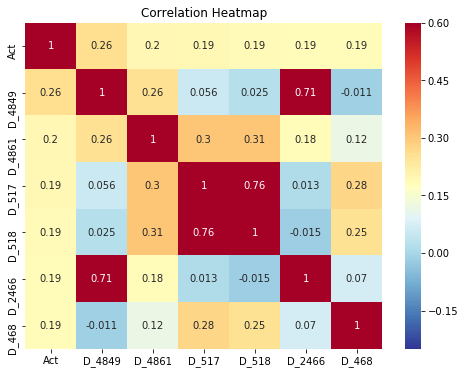

In [21]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

## ANOVA

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [13]:
dim_red_450=pd.read_csv('ACT1_train_450.csv')
dim_red_450.head()

,Unnamed: 0,D_212,D_213,D_214,D_215,D_216,D_217,D_219,D_294,D_295,...,D_7351,D_7352,D_7954,D_7955,D_7957,D_7958,D_8051,D_8053,D_8054,Act
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0179
1,1,0,0,0,0,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,4.3003
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.2697
3,3,0,0,0,0,0,0,0,1,0,...,0,0,2,2,3,2,1,1,1,6.1797
4,4,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,1,0,0,1,4.3003


In [14]:
X = dim_red_450.iloc[:,1:443]  #independent columns
y = dim_red_450['Act']    #target column Act

In [15]:
#apply SelectKBest class to extract top 50 best features using ANOVA F-value
bestfeatures = SelectKBest(score_func=f_classif, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))  #print 10 best features

      Specs     Score
63    D_521  2.164185
62    D_520  1.944435
64    D_522  1.926123
65    D_523  1.824274
61    D_519  1.758741
76    D_836  1.722231
74    D_834  1.643289
38    D_468  1.627976
60    D_518  1.590501
54    D_512  1.555200
59    D_517  1.545689
75    D_835  1.542058
368  D_4849  1.528191
351  D_4363  1.522969
415  D_7235  1.516612
380  D_4861  1.508240
39    D_469  1.485882
58    D_516  1.471480
55    D_513  1.458812
68    D_795  1.419102
164  D_1961  1.411384
69    D_796  1.404702
77    D_837  1.369594
22    D_386  1.347526
32    D_462  1.344847
395  D_5524  1.341293
416  D_7236  1.329148
79    D_839  1.324043
398  D_5527  1.321123
70    D_797  1.309610
328  D_2919  1.303667
13    D_300  1.289841
379  D_4860  1.288818
404  D_5608  1.283342
57    D_515  1.282376
130  D_1173  1.267163
37    D_467  1.254339
365  D_4823  1.254022
80    D_840  1.248153
47    D_505  1.242837
397  D_5526  1.238082
394  D_5523  1.238026
11    D_298  1.234703
165  D_1962  1.230231
128  D_112

In [16]:
feat_ix_keep = fit.get_support(indices=True) #features with the top 50 highest score
orig_feat_ix = np.arange(dim_red_450.columns.size)
feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
# Delete zero variance feats from the data frame
Anova_50 = dim_red_450.drop(labels=dim_red_450.columns[feat_ix_delete],axis=1)

In [17]:
Anova_50['Act']=y
Anova_50.head()

,D_297,D_298,D_299,D_385,D_395,D_466,D_467,D_468,D_476,D_505,...,D_4860,D_4941,D_5522,D_5523,D_5525,D_5526,D_5607,D_7234,D_7235,Act
0,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,3,2,6.0179
1,0,0,0,0,0,3,1,2,0,2,...,0,0,1,1,0,0,0,0,0,4.3003
2,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,0,0,3,5,5.2697
3,1,0,1,0,0,10,6,7,0,6,...,0,1,2,4,1,2,1,1,2,6.1797
4,0,0,0,7,0,0,0,0,0,2,...,0,0,2,3,0,0,1,4,3,4.3003


In [16]:
Anova_50.to_csv('ACT1_Anova_50.csv')